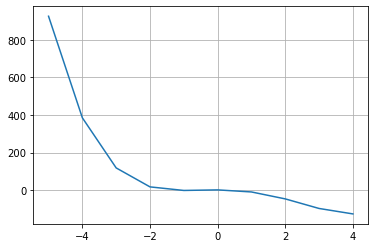

root of this  equation =  0.32951974868774414
values of this function in point c =  2.8867056565129445e-06
root of this  equation =  0.32952019368740637
values of this function in point c =  2.4379333884994026e-08


In [35]:
#task 1 
epsilon = 10**(-5)
import numpy as np
from matplotlib import pyplot
def f(x):
    return x**4 - 4*x**3 -8*x**2 + 1
def find_root_dichotomy(a, b):
    root = 0
    while (abs(f(a) - f(b)) > epsilon):
        c = (a + b) / 2
        if f(c) == 0 :
            root = c
        else:
            if f(a) * f(c) < 0:
                b = c
            else:
                a = c
    root = (a+b)/2
    return root
def find_root_hord(a,b):
    x0 = b
    x1 = a
    x2 = x0 - f(x0)*(x1 - x0)/(f(x1) - f(x0))
    while(abs(x1 - x0))>epsilon:
          x0 = x1
          x1 = x2
          x2 = x0 - f(x0)*(x1 - x0)/(f(x1) - f(x0))
    return x1
x = np.arange(-5,5, 1)
pyplot.plot(x, f(x))
pyplot.grid()
pyplot.show()
point = 2
a = point+2
b = point-2
root_1 = find_root_dichotomy(a,b)
print('root of this  equation = ' , root_1)
print('values of this function in point c = ' ,f(root_1))
root_2 = find_root_hord(a,b)
print('root of this  equation = ' , root_2)
print('values of this function in point c = ' ,f(root_2))

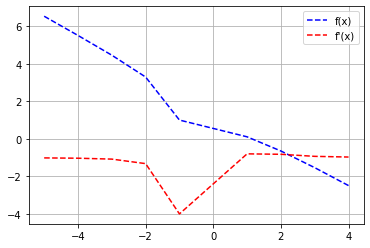

root of this  equation in method Nyton=  1.1402171787445838
values of this function in point c =  8.490319558518422e-12
root of this  equation in method Iteration =  1.1402159921955048
values of this function in point c =  8.741485433283458e-07


In [34]:
#task 2
# вводим необходимые функции f(x), ф(х)  и производной функции f(x)
#далее находим значения корней по итерационным формулам для каждого метода
def function(x):
    return atan(x**2 + 1./x) - x
def df(x):
    return (2*x - 1./x**2)/( 1 + (x**2 +1./x)**2) -1
def phi(x):
    return atan(x**2 + 1./x)
def find_root_iteration():
    x0 = -0.2
    x1 = phi(x0)
    while(abs(x1-x0)>epsilon):
        x0 = x1
        if x0==0:
            continue
        x1 = phi(x0)
    return x1
def find_root_Nyton():
    x0 = 1
    xi = x0 - function(x0)/df(x0)
    while(abs(xi - x0)>epsilon):
        x0 = xi
        xi = x0 - function(x0)/df(x0)
    return xi
x_without_zero = []
for elem in x:
    if elem!=0:
        x_without_zero.append(elem)
y = [function(i) for i in x_without_zero]
pyplot.plot(x_without_zero,y,'b--',label = 'f(x)')
y_diff = [df(i) for i in x_without_zero]
pyplot.plot(x_without_zero,y_diff, 'r--', label = 'f\'(x)')
pyplot.legend()
pyplot.grid()
pyplot.show()
root_Nyton = find_root_Nyton()
root_iteration = find_root_iteration()
print('root of this  equation in method Nyton= ' , root_Nyton)
print('values of this function in point c = ' ,function(root_Nyton))
print('root of this  equation in method Iteration = ' , root_iteration)
print('values of this function in point c = ' ,function(root_iteration))

In [36]:
#вводим все функции , а так же их частные производные по координатам х и у 
#вводим матрицу Якоби и ее обратную матрицу для описания итерационной формулы для вектора решений
#так же для нашего удобства вводим функцию умножения матриц

from math import *
epsilon = 10**(-4)
def f1(x, y):
    return sin(x + 1) - y - 1.2
def f2(x, y):
    return 2 * x + cos(x) - 2
def matrix_f(x, y):
    return [f1(x, y), f2(x, y)]
def df1_x(x, y):
    return cos(x + 1)
def df1_y(x, y):
    return -1
def df2_x(x, y):
    return 2 - sin(x)
def df2_y(x, y):
    return 0
def ycobi(x, y):
    return [[df1_x(x, y), df1_y(x, y)],
            [df2_x(x, y), df2_y(x, y)]]
def reverse_ycobi(x, y):
    return [[df2_y(x, y), -df1_y(x, y)],
            [-df2_x(x, y), df1_x(x, y)]]
def multiply(X, Y):
    return [
        (X[0][0] * Y[0] + X[0][1] * Y[1]),
        (X[1][0] * Y[0] + X[1][1] * Y[1])
    ]
def find_root_Nyton_system():
    solutions_0 = [-0.5, -0.5]
    solutions_k = []
    solutions_k.append(solutions_0[0] - multiply(reverse_ycobi(solutions_0[0], solutions_0[1]),
                                                 matrix_f(solutions_0[0], solutions_0[1]))[0])
    solutions_k.append(solutions_0[1] - multiply(reverse_ycobi(solutions_0[0], solutions_0[1]),
                                                 matrix_f(solutions_0[0], solutions_0[1]))[1])
    while sqrt((solutions_k[0] - solutions_0[0]) ** 2 + ((solutions_k[1] - solutions_0[1]) ** 2)) > epsilon:
        solutions_0[0] = solutions_k[0]
        solutions_0[1] = solutions_k[1]
        solutions_k[0] = (solutions_0[0] - multiply(reverse_ycobi(solutions_0[0], solutions_0[1]),
                                                    matrix_f(solutions_0[0], solutions_0[1]))[0])
        solutions_k[1] = (solutions_0[1] - multiply(reverse_ycobi(solutions_0[0], solutions_0[1]),
                                                    matrix_f(solutions_0[0], solutions_0[1]))[1])
    return solutions_k
root_system = find_root_Nyton_system()
print('solutions of the system =' , '(',root_system[0],',', root_system[1],')')
print("value of system = ",'(', f1(root_system[0], root_system[1]) ,',' , f2(root_system[0], root_system[1]),')')
          




solutions of the system = ( 0.5824430982357904 , -0.20008628117105365 )
value of system =  ( 1.8458295226286836e-05 , 7.475097326459235e-06 )
